<a href="https://colab.research.google.com/github/heringo/pro3600/blob/theo/Financev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
ticker='RNL.F'
df = yf.download(ticker, start='2010-01-01',end='2022-12-31')
df3 = yf.download('AAPL',start='2010-01-01',end='2022-12-31')
df31 = df3['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# 1. Filter out the closing market price data
close_data = df.filter(['Adj Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=5 , epochs=3)

# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2. Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(((predictions-df[training_data_len:])**2)))
print(rmse)


Epoch 1/3
450/450 [==============================] - 27s 41ms/step - loss: 0.0042
Epoch 2/3
450/450 [==============================] - 18s 40ms/step - loss: 0.0013
Epoch 3/3
31/31 [==============================] - 1s 17ms/step
Open            2.440725
High            2.643161
Low             2.436015
Close           2.548956
Adj Close       1.645831
Volume       4443.910163
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<ipython-input-7-a3f1508c8bd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


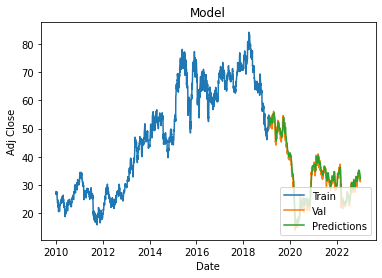

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
 
valid['Predictions'] = predictions
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [ ]:
# 1. Filter out the closing market price data
close_data1 = df3.filter(['Adj Close'])
 
# 2. Convert the data into array for easy evaluation
dataset2 = close_data1.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler.fit_transform(dataset2)
 
# 4. Creating training data size : 70% of the data
training_data_len1 = math.ceil(len(dataset2) *.7)
train_data1 = scaled_data1[0:training_data_len1  , : ]
 


# 1. Creating a dataset for testing
test_data1 = scaled_data1[training_data_len1 - 60: , : ]
x_test2 = []
y_test2 =  dataset2[training_data_len1 : , : ]
for i in range(60,len(test_data1)):
    x_test2.append(test_data1[i-60:i,0])
 
# 2. Convert the values into arrays for easier computation
x_test2 = np.array(x_test2)
x_test2 = np.reshape(x_test2, (x_test2.shape[0],x_test2.shape[1],1))


predictions2= model.fit(x_test2)
train1 = df3[:training_data_len1]
valid1 = df3[training_data_len1:]
 
valid1['Predictions'] = predictions2
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

ValueError: ignored

[*********************100%***********************]  1 of 1 completed


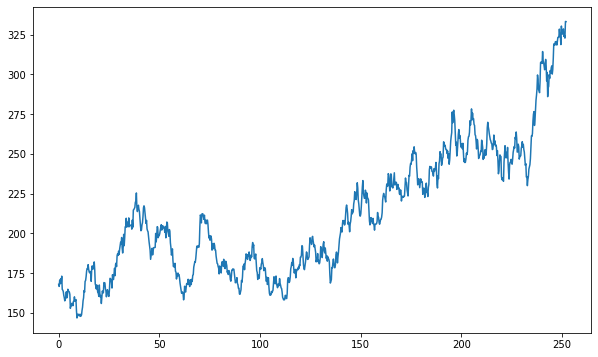

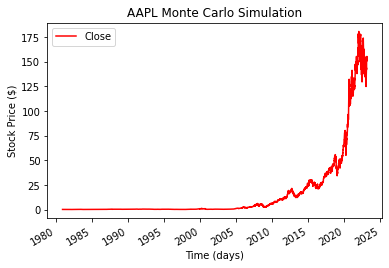

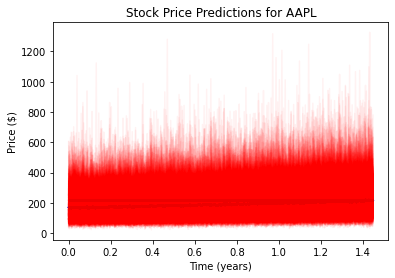

Mean of Predictions:  217.2619038020073
95% Confidence Interval:  (211.9562750907513, 222.56753251326333)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical data for selected stock
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2022-02-21")

# Define variables
S = data["Adj Close"]
mu = np.log(1 + data["Adj Close"].pct_change().mean())
sigma = data["Adj Close"].pct_change().std()
T = 252
n = 1000
t = np.linspace(0, T, n)

# Generate Brownian motion
B = np.random.standard_normal(size=(n, 1))

# Generate stock price
G = S[-1] * np.exp((mu - sigma**2 / 2) * t[:, np.newaxis] + sigma * np.cumsum(B, axis=0))

# Plot stock price simulation
plt.figure(figsize=(10, 6))
plt.plot(t, G)
df.plot(color='red')
plt.xlabel("Time (days)")
plt.ylabel("Stock Price ($)")
plt.title(f"{ticker} Monte Carlo Simulation")
plt.show()


import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def predict_prices(ticker, days, iterations):
    # Download historical data
    stock = yf.Ticker(ticker)
    data = stock.history(period="max")

    # Calculate daily returns
    returns = data['Close'].pct_change()
    returns = returns.dropna()

    # Calculate annualized mean and standard deviation of returns
    mu = returns.mean() * 252
    sigma = returns.std() * np.sqrt(252)

    # Set initial stock price and time horizon
    S = data['Close'][-1]
    T = days / 252
    t = np.linspace(0, T, days)

    # Generate random Brownian motion
    B = np.random.standard_normal(size=(days, iterations))

    # Calculate stock price paths
    G = S * np.exp((mu - sigma**2 / 2) * t[:, np.newaxis] + sigma * B)
    G_mean = np.mean(G, axis=1)

    # Calculate upper and lower bounds of confidence interval
    conf_int = norm.interval(0.95, loc=G_mean[-1], scale=G_mean[-1] - G_mean[-2])

    # Plot stock price paths and confidence interval
    plt.plot(t, G_mean, color='b', lw=2)
    plt.plot(t, G, alpha=0.05, color='r')
    plt.fill_between(t, conf_int[0], conf_int[1], color='b', alpha=0.1)
    plt.xlabel('Time (years)')
    plt.ylabel('Price ($)')
    plt.title('Stock Price Predictions for ' + ticker)
    plt.show()

    # Print mean of predictions and confidence interval
    print("Mean of Predictions: ", G_mean[-1])
    print("95% Confidence Interval: ", conf_int)

# Example usage
predict_prices('AAPL', 365, 1000)



[*********************100%***********************]  1 of 1 completed


ValueError: ignored

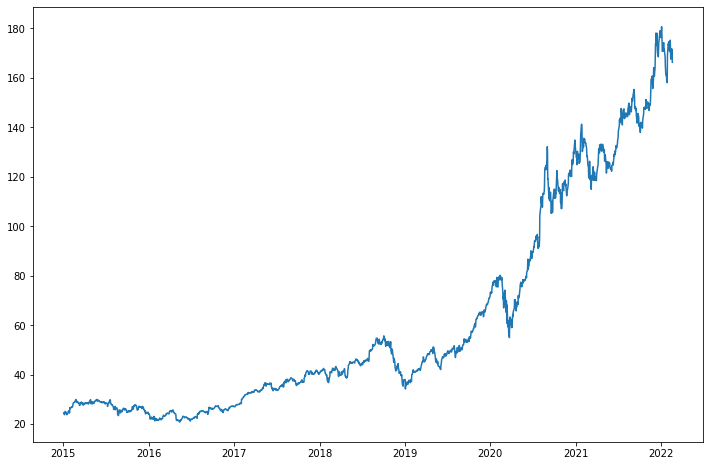

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical data for Apple from Yahoo Finance
start_date = '2015-01-01'
end_date = '2022-02-21'
apple_data = yf.download('AAPL', start_date, end_date)

# Compute the log returns of the stock prices
returns = np.log(1 + apple_data['Adj Close'].pct_change().dropna())

# Set the parameters for the GBM
S = apple_data['Adj Close'][-1] # initial stock price
T = 252 # time horizon in trading days (1 year)
mu = np.mean(returns) # average log return
sigma = np.std(returns) # standard deviation of log returns

# Generate random Brownian motion using numpy
t = np.linspace(0, T, T+1)
B = np.random.standard_normal(size=(T+1, 1000))
B = np.cumsum(B, axis=0)

# Compute the stock price at each time step
G = S * np.exp((mu - sigma**2 / 2) * t[:, np.newaxis] + sigma * B)

# Compute the mean and standard deviation of the simulated stock prices
mean_G = np.mean(G, axis=1)
std_G = np.std(G, axis=1)

# Convert the index of the actual price data to datetime format
date_index = pd.to_datetime(apple_data.index)

# Plot the predicted price curve along with the actual price curve
plt.figure(figsize=(12, 8))
plt.plot(date_index, apple_data['Adj Close'], label='Actual Price')
plt.plot(date_index, mean_G, label='Predicted Price')
plt.fill_between(t, mean_G - 2*std_G, mean_G + 2*std_G, alpha=0.2)
plt.xlabel('Time (days)')
plt.ylabel('Stock Price ($)')
plt.title('Apple Stock Price Prediction Using Geometric Brownian Motion')
plt.legend()
plt.show()


In [ ]:
pip install tf-quant-finance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.4 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [ ]:

import tensorflow as tf
import tf_quant_finance as tff
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
start_date = '2015-01-01'
end_date = '2022-02-21'
apple_data = yf.download('AAPL', start=start_date, end=end_date)
returns = np.log(1 + apple_data['Adj Close'].pct_change().dropna())
S = apple_data['Adj Close'][-1]  # initial stock price
T = 252  # time horizon in trading days (1 year)
mu = np.mean(returns)  # average log return
sigma = np.std(returns)  # standard deviation of log returns
num_samples = 1
num_times = T
num_stock = 1
dt = 1. / T
drift_rate = tf.convert_to_tensor([mu], dtype=tf.float64)
vol_rate = tf.convert_to_tensor([sigma], dtype=tf.float64)
corr_matrix = tf.convert_to_tensor([[1.0]], dtype=tf.float64)
num_factors = 1

gbm_model = tff.models.GeometricBrownianMotion(
    num_times=num_times,
    num_stock=num_stock,
    drift_rate=drift_rate,
    vol_rate=vol_rate,
    corr_matrix=corr_matrix,
    num_factors=num_factors,
    dtype=tf.float64)
times = np.linspace(0, T, num_times + 1)
dt_tensor = tf.constant(dt, dtype=tf.float64)
times_tensor = tf.constant(times, dtype=tf.float64)

stock_prices = gbm_model.simulate_mc(
    num_samples=num_samples,
    times=times_tensor,
    time_step=dt_tensor,
    random_type='pseudorandom')


[*********************100%***********************]  1 of 1 completed


TypeError: ignored

In [ ]:
import tensorflow as tf
import tf_quant_finance as tff
process = tff.models.GeometricBrownianMotion(0.05, 1.0, dtype=tf.float64)
times = [0.1, 0.2, 1.0]
# Use SOBOL sequence to draw trajectories
samples_sobol = process.sample_paths(
    times=times,
    initial_state=1.5,
    random_type=tff.math.random.RandomType.SOBOL,
    num_samples=100000)

# You can also supply the random normal draws directly to the sampler
normal_draws = tf.random.stateless_normal(
    [100000, 3, 1], seed=[4, 2], dtype=tf.float64)
samples_custom = process.sample_paths(
    times=times,
    initial_state=1.5,
    normal_draws=normal_draws)